In [1]:
import pandas as pd
import numpy as np 
import plotly_express as px
import plotly.graph_objects as go


In [11]:
from  comprendre_api.Clean_donnees import liste_propre


data = pd.concat([liste_propre(code_commune=None, taille_echantillon=10000),
                liste_propre(code_commune=None, taille_echantillon=10000),
                liste_propre(code_commune=None, taille_echantillon=10000),
                liste_propre(code_commune=None, taille_echantillon=10000)],
                axis=0, 
                ignore_index=True)
data.head(1)

,_id,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,tr002_type_batiment_description,code_insee_commune_actualise,geo_adresse,td006_batiment_id,longueur,tv013_valeur_pont_thermique_id,Code_ Pont_Thermique,result_label,result_score,tr004_type_energie_id,consommation_surface_ratio


In [12]:
data= pd.read_excel('visualisation.xlsx')

In [13]:
data.describe()

,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,code_insee_commune_actualise
count,2944.000000,2938.000000,2944.000000,2998.000000,2938.000000,2822.000000,3000.0
mean,131.283736,2.850919,21.987877,87.176971,3.089517,1960.747342,91477.0
std,108.429540,1.345202,22.776444,289.954729,1.474497,280.035735,0.0
min,2.260000,1.000000,0.510000,1.000000,1.000000,1.000000,91477.0
25%,66.510000,2.000000,8.320000,38.285000,2.000000,1988.000000,91477.0
50%,80.100000,2.000000,12.410000,58.505000,3.000000,2015.000000,91477.0
75%,154.000000,4.000000,25.135000,76.030000,4.000000,2015.000000,91477.0
max,957.000000,7.000000,210.400000,6994.500000,7.000000,2021.000000,91477.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id                              3000 non-null   object 
 1   consommation_energie             2944 non-null   float64
 2   classe_consommation_energie      2938 non-null   float64
 3   estimation_ges                   2944 non-null   float64
 4   surface_thermique_lot            2998 non-null   float64
 5   classe_estimation_ges            2938 non-null   float64
 6   annee_construction               2822 non-null   float64
 7   tr002_type_batiment_description  3000 non-null   object 
 8   code_insee_commune_actualise     3000 non-null   int64  
 9   geo_adresse                      2861 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 234.5+ KB


In [15]:
condition=(data['annee_construction']<1800)|(data['annee_construction']>2023)|(data['consommation_energie']<0)
data=data[~condition]
data.describe()


,consommation_energie,classe_consommation_energie,estimation_ges,surface_thermique_lot,classe_estimation_ges,annee_construction,code_insee_commune_actualise
count,2889.000000,2894.000000,2889.00000,2942.000000,2894.000000,2766.000000,2944.0
mean,130.018024,2.828956,21.57559,86.967872,3.058742,2000.424078,91477.0
std,107.920760,1.333751,22.52193,292.330796,1.456598,25.474588,0.0
min,2.260000,1.000000,0.51000,1.000000,1.000000,1850.000000,91477.0
25%,66.510000,2.000000,8.26000,38.000000,2.000000,1991.000000,91477.0
50%,80.100000,2.000000,12.31000,58.000000,3.000000,2015.000000,91477.0
75%,145.040000,3.000000,24.26000,75.222500,4.000000,2015.000000,91477.0
max,957.000000,7.000000,210.40000,6994.500000,7.000000,2021.000000,91477.0


In [17]:
value_counts = data['classe_consommation_energie'].value_counts().reset_index()

value_counts.columns = ['classe_consommation_energie', 'Count']
fig = px.bar(value_counts, 
             x='classe_consommation_energie', 
             y='Count', 
             title='Value Counts of classe_consommation_energie',
             template='plotly_dark',
             color_discrete_sequence=['#F63366'],
             opacity=0.8,
             width=800,
             height=500)
fig.show()

In [36]:
value_counts = data['tr002_type_batiment_description'].value_counts().reset_index()

value_counts.columns = ['tr002_type_batiment_description', 'Count']
fig = px.bar(value_counts, 
             x='tr002_type_batiment_description', 
             y='Count', 
             title='Value Counts of building type',
             template='plotly_dark',
             color_discrete_sequence=['#F63366'],
             opacity=0.8)


fig.update_layout(
    title="Value Counts of building type",
    xaxis_title="Building type",
    yaxis_title="Count",
    hoverlabel_bgcolor='white'
    )

fig.show()

In [52]:
value_counts = data['consommation_energie'].value_counts().reset_index()
value_counts.columns = ['consommation_energie', 'Count']

fig = px.histogram(value_counts, 
             x='consommation_energie', 
             y='Count', 
             barmode='overlay',
             title='Value Counts of consommation_energie',
             template='plotly_dark',
             color_discrete_sequence=['#F63366'],
             opacity=0.8)


fig.update_layout(
    title="Value Counts of building type",
    xaxis_title="Consommation énergie",
    yaxis_title="Count",
    hoverlabel_bgcolor='white'
    )

fig.show()
# data['consommation_energie'].hist(bins=100)


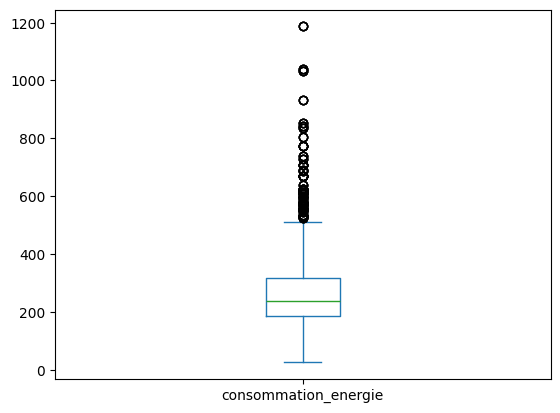

In [ ]:
data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].plot.box()
Q1=data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].quantile(0.25)
Q3=data[(data['tr002_type_batiment_description']=="Logement")]['consommation_energie'].quantile(0.75)
IQR=Q3-Q1
coef=IQR*1.5
limite_inf=Q1-coef
limite_sup=Q3+coef
result=data[(data['consommation_energie']>limite_sup)|(data['consommation_energie']<limite_inf)]
data_clean=data.drop(result.index)
# data_clean['consommation_energie'].hist(bins=100)


In [ ]:


for elem in data['tr002_type_batiment_description'].unique().tolist(): 
    data_sorted= data[data['tr002_type_batiment_description']==elem]
    print(f"{elem}: {np.mean(data_sorted['consommation_energie'])} kWhEP/m².an ")
    print(f"{elem}: {np.mean(data_sorted['estimation_ges'])} Kg eqCO2/m².an ")



Logement: 268.29783444816053 kWhEP/m².an 
Logement: 36.77678093645485 Kg eqCO2/m².an 
Maison Individuelle: 261.4205771111836 kWhEP/m².an 
Maison Individuelle: 35.51785784153896 Kg eqCO2/m².an 
Bâtiment collectif à usage principal d'habitation: 330.5564516129032 kWhEP/m².an 
Bâtiment collectif à usage principal d'habitation: 41.20516129032258 Kg eqCO2/m².an 
